In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import *


## Get to know with the data 

In [2]:
data = pd.read_csv(r'C:\Users\aleks\OneDrive\Documents\BAYES\healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [5]:
data = data[~(data['gender'] == 'Other')]

In [6]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [8]:
data.isnull().sum()/len(data) * 10

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.393423
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5109.0,36513.985516,21162.008804,67.00,17740.00,36922.00,54643.00,72940.00
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,4908.0,28.894560,7.854320,10.30,23.50,28.10,33.10,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


## Preprocessing 

In [10]:
data = clean_data(data)

c:\Users\aleks\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [11]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Data analysing and visualisation

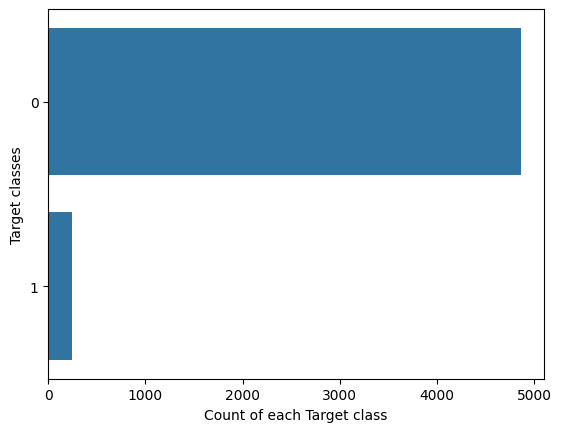

In [12]:
sns.countplot(y=data['stroke'] ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

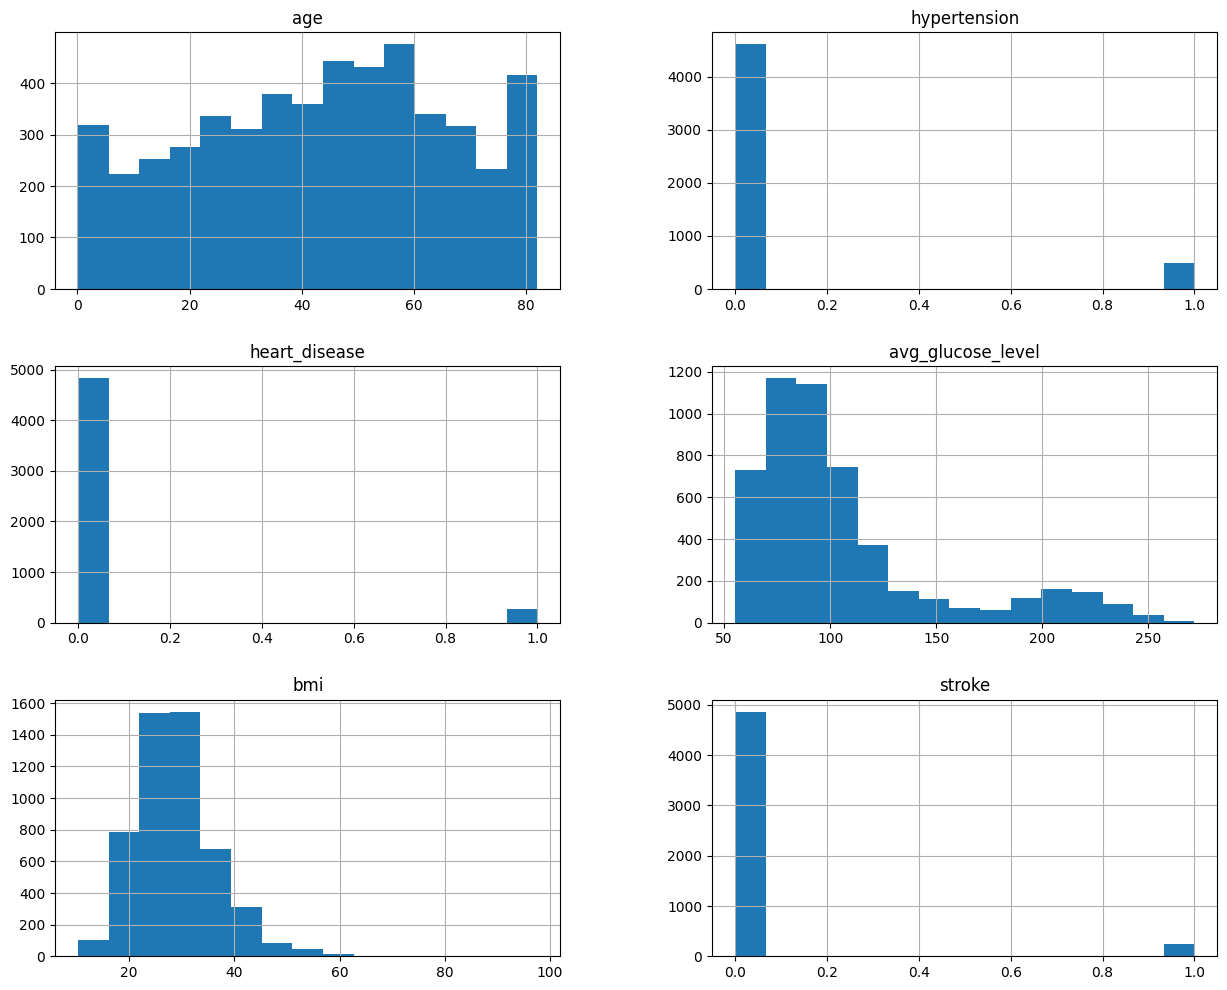

In [13]:
data.hist(figsize=(15,12),bins = 15)
plt.show()

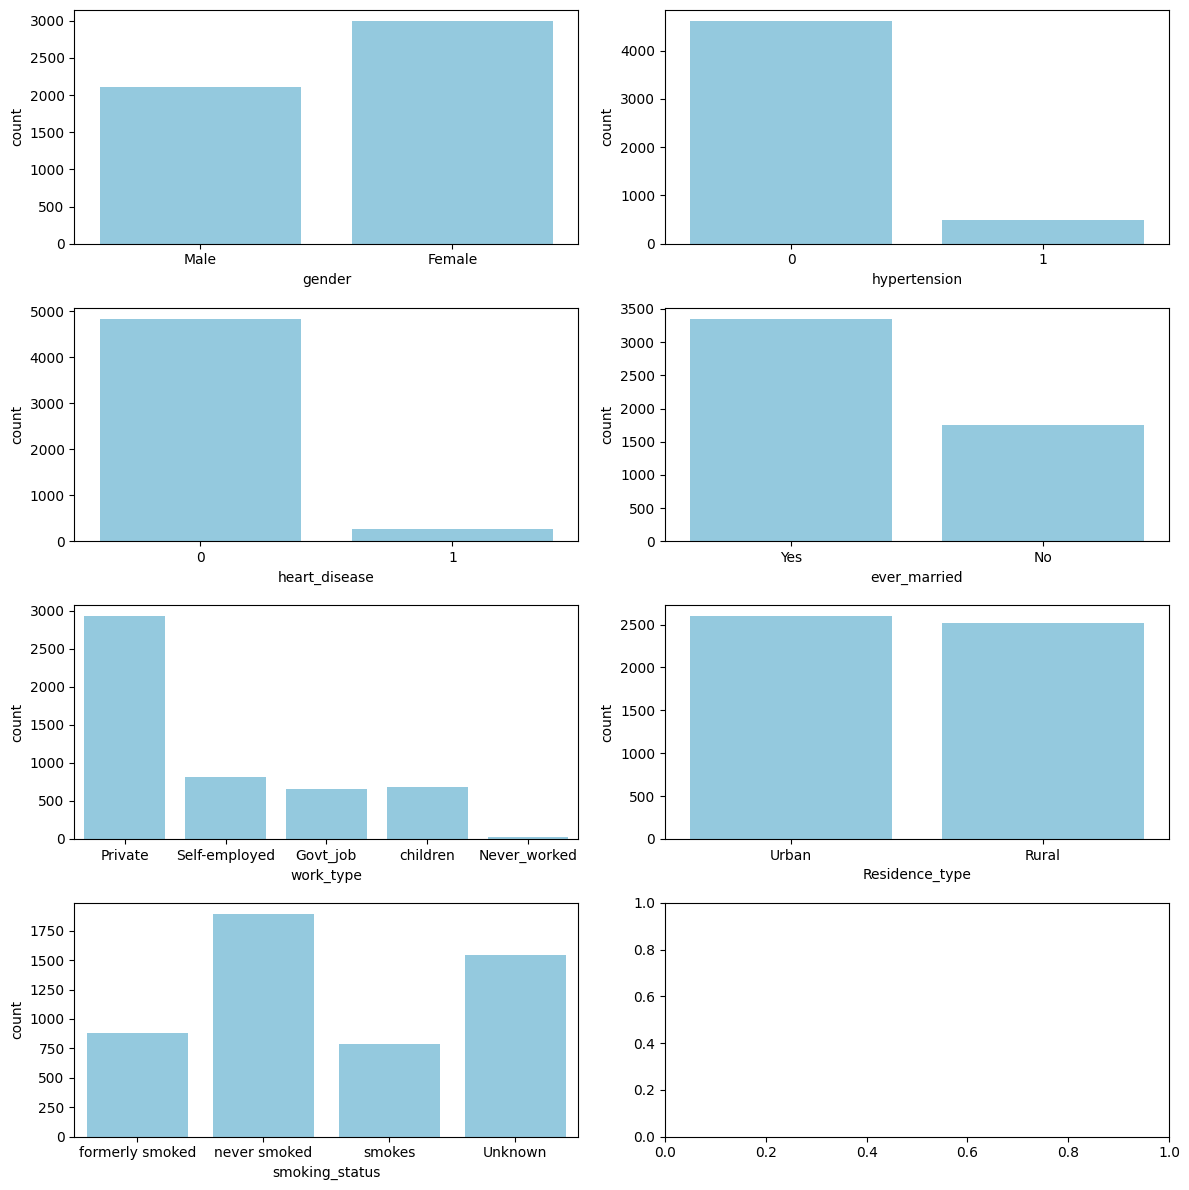

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))
sns.countplot(ax = axes[0,0], x='gender', data=data, color='skyblue')
sns.countplot(ax = axes[0,1], x='hypertension', data=data, color='skyblue')
sns.countplot(ax = axes[1,0], x='heart_disease', data=data, color='skyblue')
sns.countplot(ax = axes[1,1], x='ever_married', data=data, color='skyblue')
sns.countplot(ax = axes[2,0], x='work_type', data=data, color='skyblue')
sns.countplot(ax = axes[2,1], x='Residence_type', data=data, color='skyblue')
sns.countplot(ax = axes[3,0], x='smoking_status', data=data, color='skyblue')
plt.tight_layout()
plt.show()

<Axes: xlabel='stroke', ylabel='bmi'>

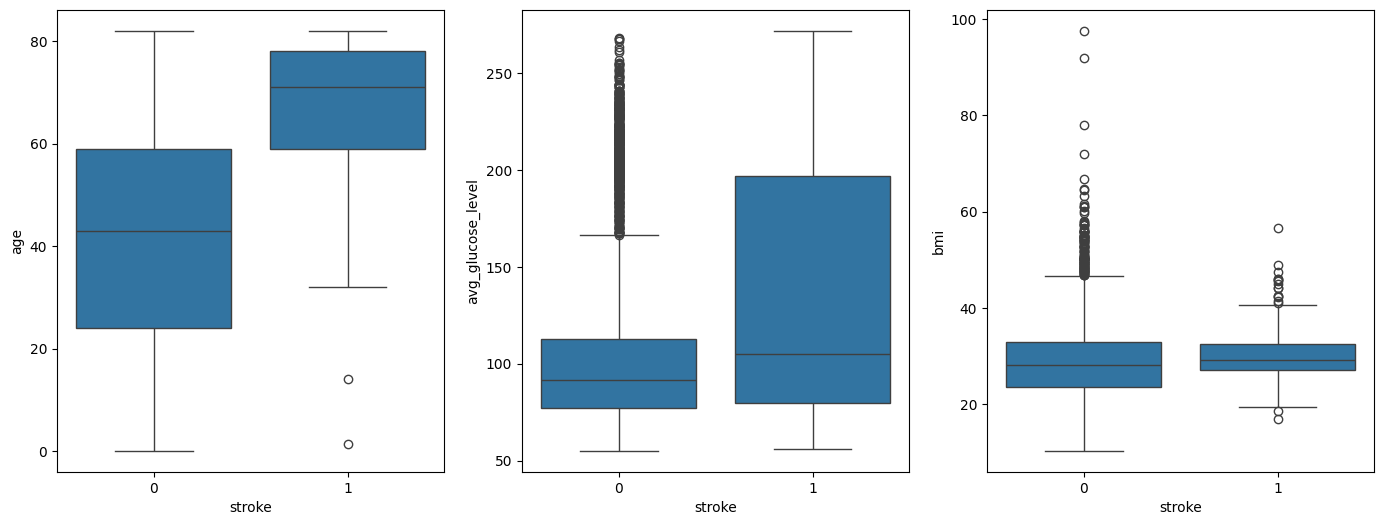

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(17,6))
sns.boxplot(ax = axes[0], data=data, x="stroke", y="age")
sns.boxplot(ax = axes[1], data=data, x="stroke", y="avg_glucose_level")
sns.boxplot(ax = axes[2], data=data, x="stroke", y="bmi")


In [16]:
data = deal_with_categorical_features(data)

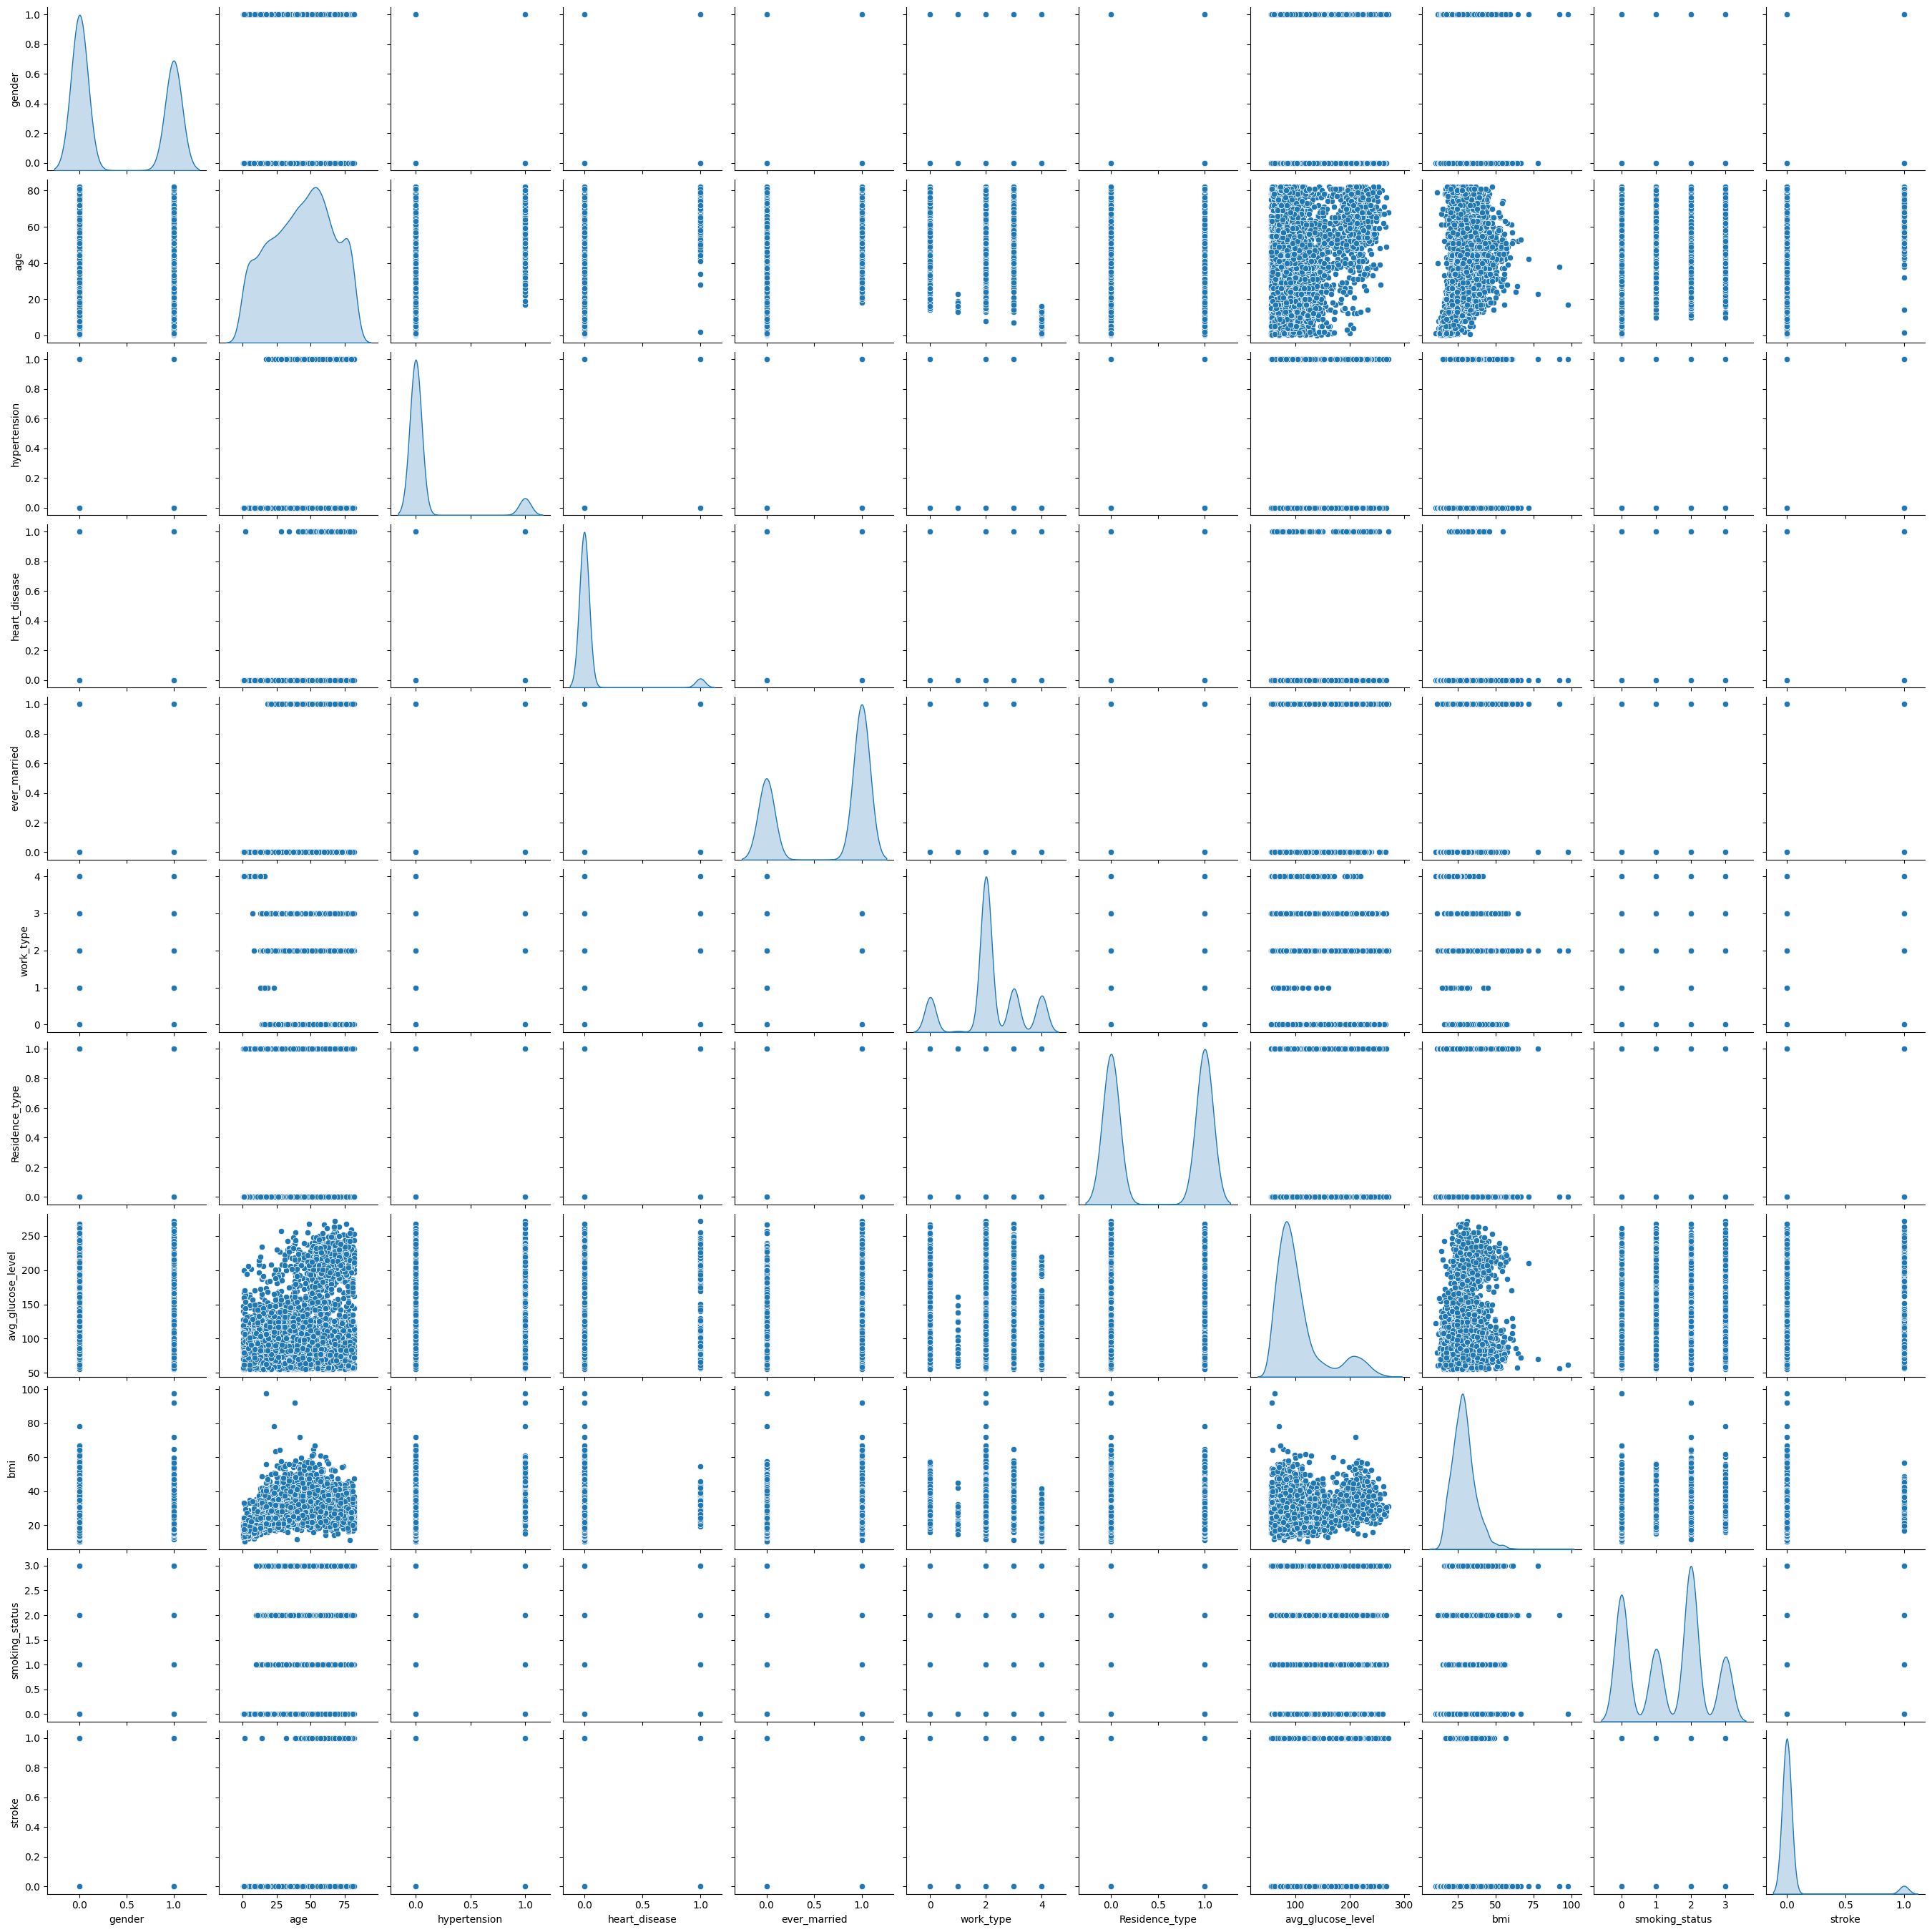

In [17]:
sns.pairplot(data, diag_kind='kde')   

## Correlation analysis

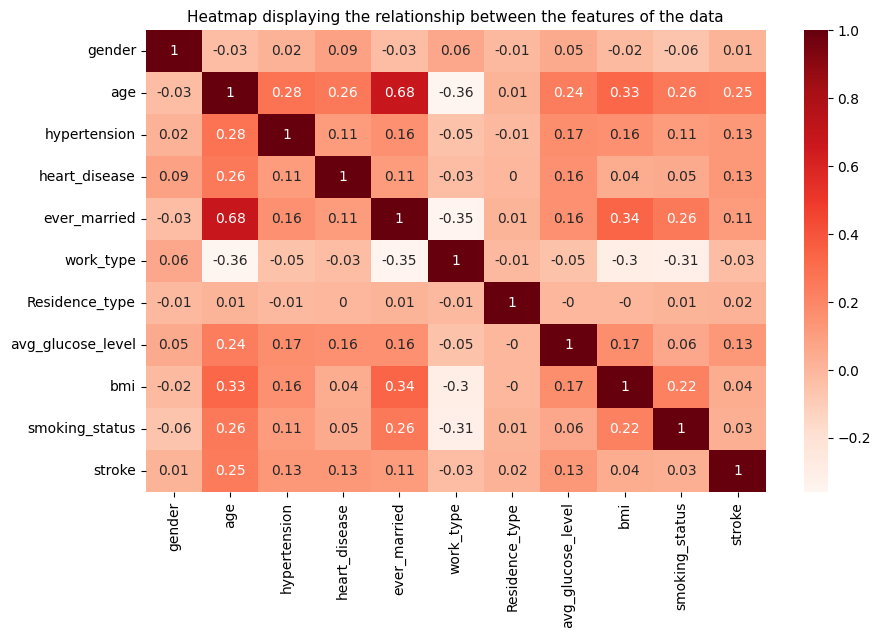

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr().round(2), cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=11)
plt.show()

# Statystyki kolumn

In [19]:
data['gender'].value_counts(normalize=True) * 100

gender
0    58.613939
1    41.386061
Name: proportion, dtype: float64

In [20]:
data['smoking_status'] = ['smokes' if row == 'formerly smoked' else row for row in data['smoking_status']]

In [21]:
data['smoking_status'].value_counts(normalize=True) * 100

smoking_status
2.0    37.039937
0.0    30.207518
1.0    17.306186
3.0    15.446359
Name: proportion, dtype: float64

In [22]:
for i in range(len(data['age'])):
    row = data['age'].iloc[i]
    if row < 12:
        data['age'].iloc[i] = 'dziecko'
    elif row < 20:
        data['age'].iloc[i] = 'młodzież'
    elif row < 60:
        data['age'].iloc[i] = 'dorosły'
    else:
        data['age'].iloc[i] = 'emeryt'

C:\Users\aleks\AppData\Local\Temp\ipykernel_53400\2647288259.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['age'].iloc[i] = 'emeryt'
C:\Users\aleks\AppData\Local\Temp\ipykernel_53400\2647288259.py:10: SettingWithCopyWarning: 
A v

In [23]:
data['age'].value_counts(normalize=True) * 100

age
dorosły     54.169930
emeryt      26.938136
dziecko     10.610807
młodzież     8.281128
Name: proportion, dtype: float64

In [24]:
for i in range(len(data['bmi'])):
    row = data['bmi'].iloc[i]
    if row < 18:
        data['bmi'].iloc[i] = 'niskie'
    elif row < 35:
        data['bmi'].iloc[i] = 'ok'
    else:
        data['bmi'].iloc[i] = 'wysokie'

C:\Users\aleks\AppData\Local\Temp\ipykernel_53400\2023358431.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['bmi'].iloc[i] = 'wysokie'
C:\Users\aleks\AppData\Local\Temp\ipykernel_53400\2023358431.py:8: SettingWithCopyWarning: 
A va

In [25]:
data['bmi'].value_counts(normalize=True) * 100

bmi
ok         76.546594
wysokie    18.010963
niskie      5.442443
Name: proportion, dtype: float64

## wyliczanie prawdopodobienstw warunkowych 